<a href="https://colab.research.google.com/github/Steffenanderson/Machine-Learning-Exercises/blob/main/QuickDA_Titanic_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install QuickDA

In [1]:
pip install quickda

In [2]:
pip install pandas-profiling==2.8.0

# Import Libaries & Load Data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings 
warnings.filterwarnings('ignore')


from quickda.explore_data import *
from quickda.clean_data import *
from quickda.explore_numeric import *
from quickda.explore_categoric import *
from quickda.explore_numeric_categoric import *
from quickda.explore_time_series import *

In [4]:
# Load Data
titanic = pd.read_csv('/content/drive/MyDrive/Coding Dojo/Week 4/titanic.csv')
titanic.head()

PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]

# Analysing the Dataset

## Summarize Report

In [5]:
explore(titanic)

dtypes  count  null_sum  ...   median       std      skew
Age          float64    714       177  ...       28   14.5265  0.389108
Cabin         object    204       687  ...        -         -         -
Embarked      object    889         2  ...        -         -         -
Fare         float64    891         0  ...  14.4542   49.6934   4.78732
Name          object    891         0  ...        -         -         -
Parch          int64    891         0  ...        0  0.806057   2.74912
PassengerId    int64    891         0  ...      446   257.354         0
Pclass         int64    891         0  ...        3  0.836071 -0.630548
Sex           object    891         0  ...        -         -         -
SibSp          int64    891         0  ...        0   1.10274   3.69535
Survived       int64    891         0  ...        0  0.486592  0.478523
Ticket        object    891         0  ...        -         -         -

[12 rows x 14 columns]

## Profile Report

In [20]:
explore(titanic, method='profile', report_name= 'Profile Report',
        is_large_dataset=False)

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Data Cleaning

## Standardize Columns

In [7]:
titanic = clean(titanic)
titanic.head()

passengerid  survived  pclass  ...     fare cabin  embarked
1             2         1       1  ...  71.2833   C85         C
3             4         1       1  ...  53.1000  C123         S
6             7         0       1  ...  51.8625   E46         S
10           11         1       3  ...  16.7000    G6         S
11           12         1       1  ...  26.5500  C103         S

[5 rows x 12 columns]

## Remove Columns

In [8]:
titanic = clean(titanic, method='dropcols', columns=['name', 'passengerid'])
titanic.head()

survived  pclass     sex   age  ...    ticket     fare cabin  embarked
1          1       1  female  38.0  ...  PC 17599  71.2833   C85         C
3          1       1  female  35.0  ...    113803  53.1000  C123         S
6          0       1    male  54.0  ...     17463  51.8625   E46         S
10         1       3  female   4.0  ...   PP 9549  16.7000    G6         S
11         1       1  female  58.0  ...    113783  26.5500  C103         S

[5 rows x 10 columns]

## Replace Missing

In [9]:
titanic = clean(titanic, method= 'fillmissing', columns= ['age', 'cabin'], value= np.median)

In [10]:
explore(titanic)

dtypes  count  null_sum  ...  median       std        skew
age       float64    183         0  ...      36   15.6439  0.00967584
cabin      object    183         0  ...       -         -           -
embarked   object    183         0  ...       -         -           -
fare      float64    183         0  ...      57   76.3478     2.71588
parch       int64    183         0  ...       0  0.754617     1.51931
pclass      int64    183         0  ...       1  0.515187     2.68146
sex        object    183         0  ...       -         -           -
sibsp       int64    183         0  ...       0  0.644159     1.44302
survived    int64    183         0  ...       1  0.470725   -0.739427
ticket     object    183         0  ...       -         -           -

[10 rows x 14 columns]

# Data Visualisations

## Outlier & Distribution Analysis (Boxplot & Histograms)

Outlier Analysis - Boxplot


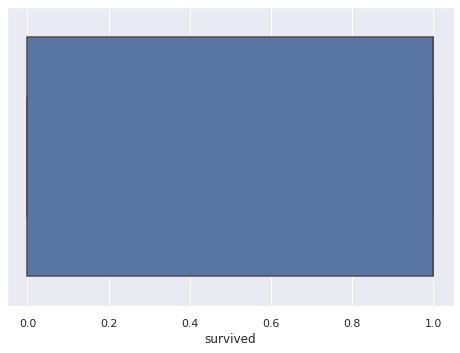

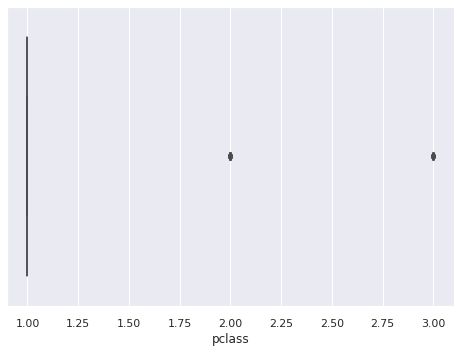

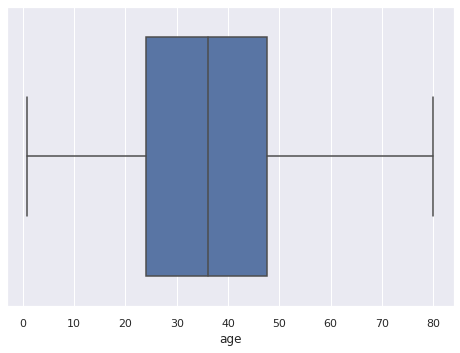

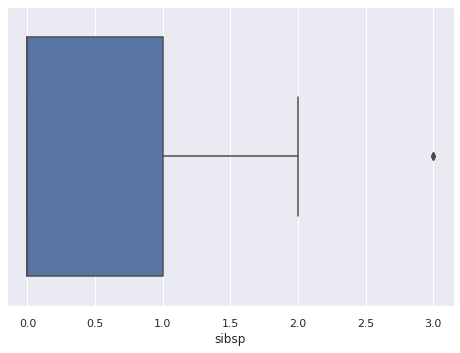

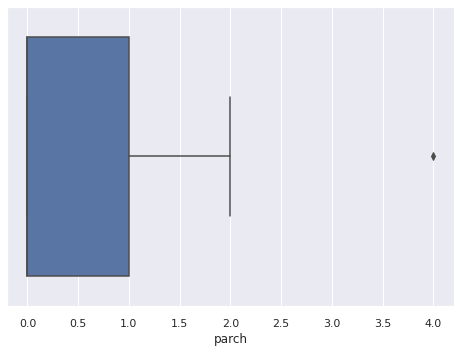

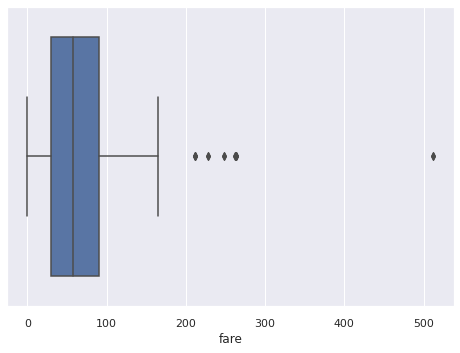

Distribution Analysis - Histogram


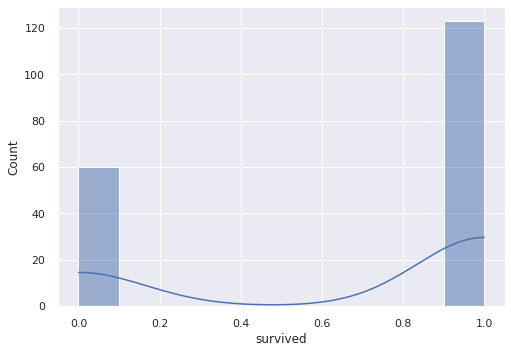

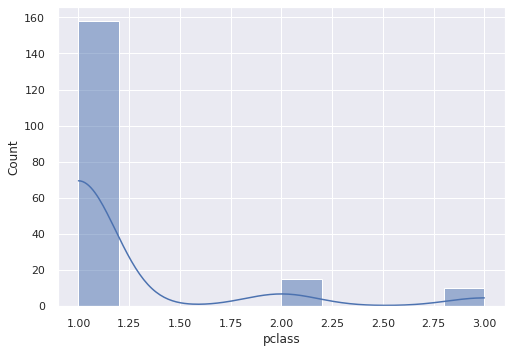

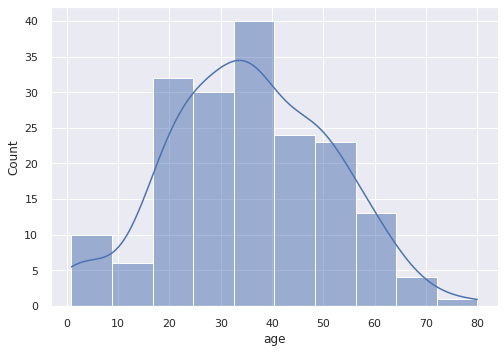

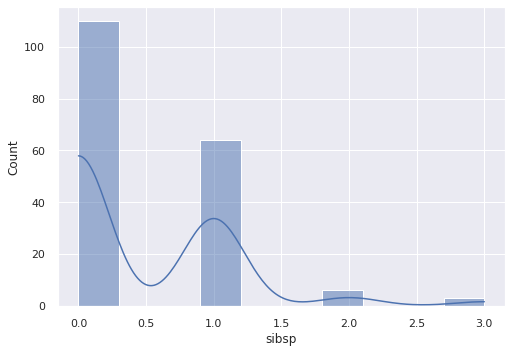

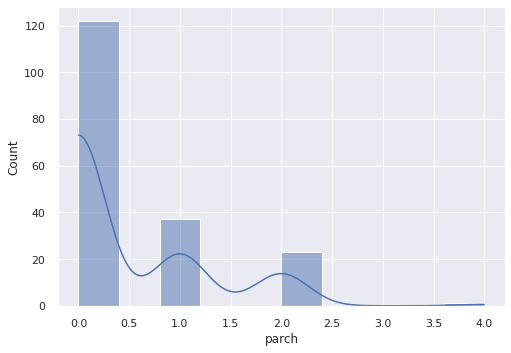

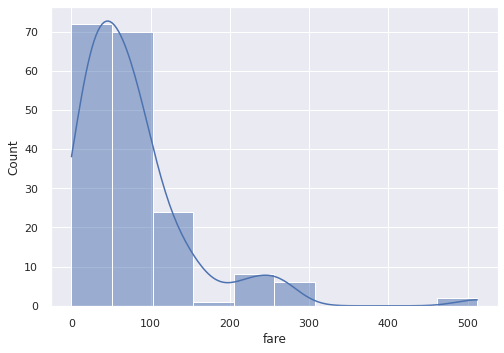

In [11]:
eda_num(titanic)

## Correlation Analysis (Heatmap)

In [21]:
eda_num(titanic, method= 'correlation')

Correlation Analysis - Heatmap


## EDA (Categorical & Numerical)

### Categorical

In [25]:
# list of categorical features
cat_col = []
for x in titanic.dtypes.index:
  if titanic.dtypes[x] == 'object':
      cat_col.append(x)
cat_col

['sex', 'ticket', 'cabin', 'embarked']

Bar Plot of sex


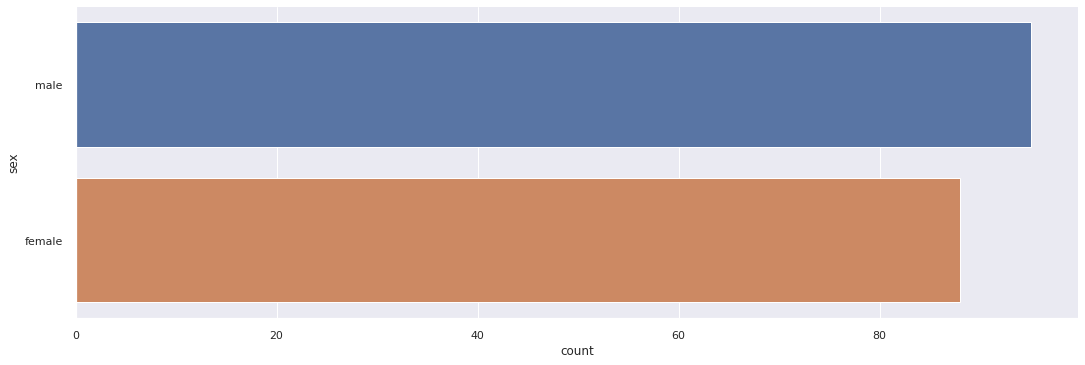

Summary of sex


count  relative_pct
male       95          0.52
female     88          0.48

In [28]:
eda_cat(titanic, x= 'sex')

Bar Plot of embarked


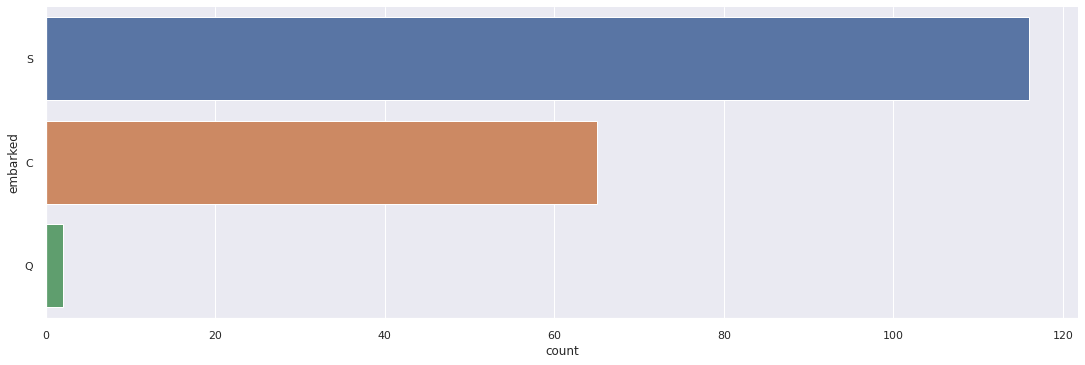

Summary of embarked


count  relative_pct
S    116          0.63
C     65          0.36
Q      2          0.01

In [31]:
eda_cat(titanic, x= 'embarked')

### Remove Outliers

In [12]:
# titanic = clean(titanic, method= 'outliers')

In [13]:
# eda_num(titanic, method= 'correlation')

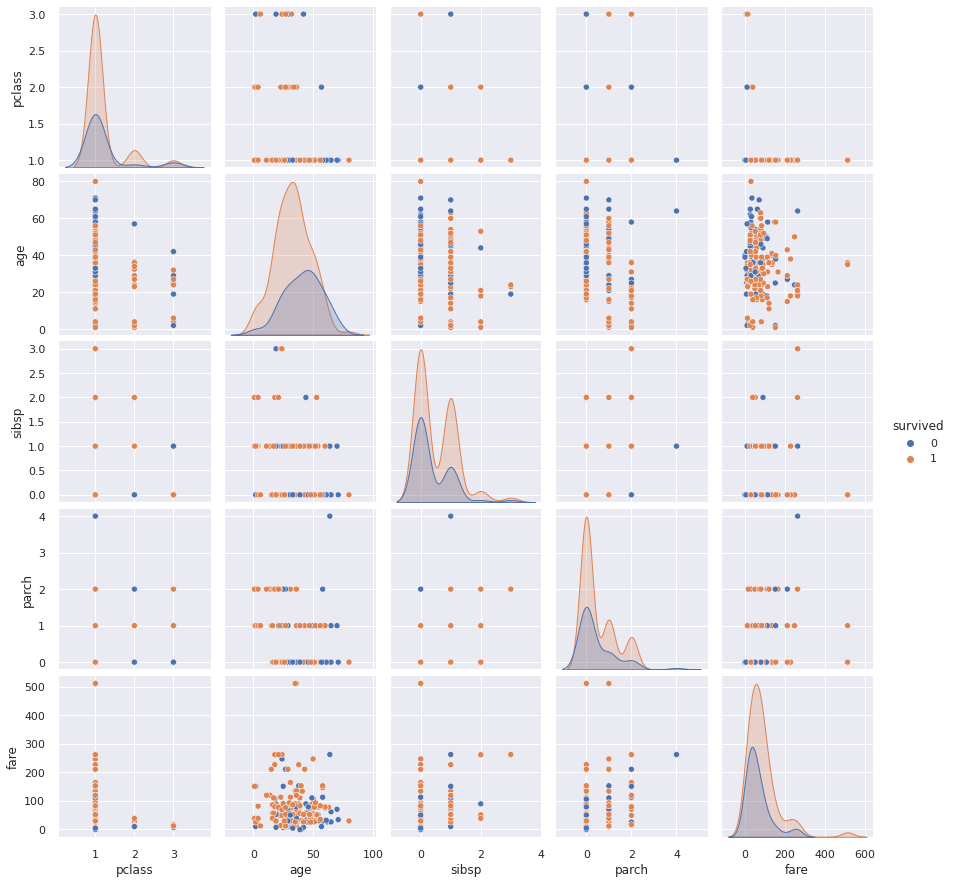

In [18]:
sns.pairplot(titanic, kind='scatter', hue='survived');